Внимательно прочитайте предлагаемую документацию (https://pandas.pydata.org/, https://scikit-learn.org/stable/), постройте требуемый классификатор и ответьте на два вопроса (включая код).
 В ответ пришлите ссылку на репозиторий с выполненной работой.

https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

Постройте модель, которая оценивает вероятность того, что в следующем году в африканской стране Mauritius произойдет кризис на базе 5летней истории (наличие кризиса, информация о валюте и внешнем долге).


В какой африканской стране кризисы происходят чаще?

Как связаны кризисы и независимость африканского государства?



Подключаем библиотеки:


In [13]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

Считываем датасет:


In [20]:
data = pd.read_csv("african_crises.csv")

In [16]:
data

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


Смотрим, какие есть страны:

In [12]:
np.unique(data["country"].values, return_counts = True)

(array(['Algeria', 'Angola', 'Central African Republic', 'Egypt',
        'Ivory Coast', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
        'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object),
 array([ 85,  77,  58, 155,  63,  67,  68,  75,  60, 114,  75,  72,  90],
       dtype=int64))

Сохраняем эти значения (но для удобства вместо названия страны берём её код) для дальнейших вычислений и по фану строим график количества наблюдений по каждой стране:

In [27]:
country, notes = np.unique(
    data["cc3"].values, return_counts = True
)

<BarContainer object of 13 artists>

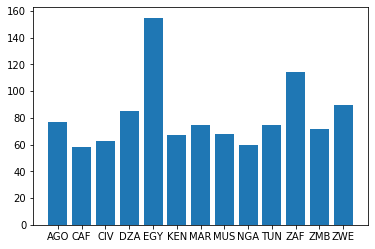

In [28]:
plt.bar(country, notes)

In [66]:
sys_cris_rate = [] 

Строим график частоты кризисов (systemic_crisis) по странам:

In [29]:
plt.bar(country, sys_cris_rate)

NameError: name 'sys_cris_rate' is not defined

In [77]:
sys_cris = data.groupby('cc3').systemic_crisis.sum()

In [71]:
#for a in sys_cris:
 #   sys_cris_rate.append(sys_cris[a] / notes * 100)

In [101]:
sys_cris_rate = []
for a in sys_cris[a]:
    sys_cris_rate.append(sys_cris[a])

IndexError: index out of bounds